In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Reading the csv file

df = pd.read_csv(r'C:\backupee\MY_New Personal Data\Learnings\Courses\ICT - Data Science & Analytics\Python\Hyp Testing_Case Study_01\Sales_add.csv')


In [17]:
# Check the first few rows of the dataframe

df.head()

,Month,Region,Manager,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
0,Month-1,Region - A,Manager - A,132921,270390
1,Month-2,Region - A,Manager - C,149559,223334
2,Month-3,Region - B,Manager - A,146278,244243
3,Month-4,Region - B,Manager - B,152167,231808
4,Month-5,Region - C,Manager - B,159525,258402


In [19]:
# Statistical summary of the numerical columns

df.describe()

,Sales_before_digital_add(in $),Sales_After_digital_add(in $)
count,22.000000,22.000000
mean,149239.954545,231123.727273
std,14844.042921,25556.777061
min,130263.000000,187305.000000
25%,138087.750000,214960.750000
50%,147444.000000,229986.500000
75%,157627.500000,250909.000000
max,178939.000000,276279.000000


In [20]:
# Check the data types of each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Month                           22 non-null     object
 1   Region                          22 non-null     object
 2   Manager                         22 non-null     object
 3   Sales_before_digital_add(in $)  22 non-null     int64 
 4   Sales_After_digital_add(in $)   22 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 1008.0+ bytes


In [21]:
# Check for missing values

df.isnull().sum()

Month                             0
Region                            0
Manager                           0
Sales_before_digital_add(in $)    0
Sales_After_digital_add(in $)     0
dtype: int64

In [23]:
# Calculate the total sales before and after digital marketing

total_sales_before = df['Sales_before_digital_add(in $)'].sum()
total_sales_after = df['Sales_After_digital_add(in $)'].sum()

In [24]:
# Conditions for comparison of the total sales before and after digital marketing

if total_sales_after > total_sales_before:
    print("There is an increase in sales after stepping into digital marketing.")
else:
    print("There is no significant increase in sales after stepping into digital marketing.")
    

There is an increase in sales after stepping into digital marketing.


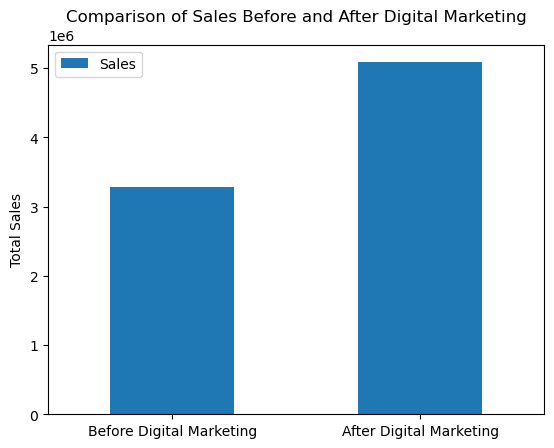

In [10]:
# Visualising the total sales before and after digital marketing

sales_data = pd.DataFrame({'Sales': [total_sales_before, total_sales_after]},
                          index=['Before Digital Marketing', 'After Digital Marketing'])
sales_data.plot(kind='bar', rot=0)
plt.ylabel('Total Sales')
plt.title('Comparison of Sales Before and After Digital Marketing')
plt.show() 

In [25]:
# To check whether there is any dependency between the features “Region” and “Manager”

# Create a contingency table for region and manager

contingency_table = pd.crosstab(df['Region'], df['Manager'])

In [26]:
# Chi-square test for independence

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(contingency_table)
alpha = 0.05

In [27]:
# Checking for any significant dependency

if p < alpha:
    print("There is a significant dependency between Region and Manager.")
else:
    print("There is no significant dependency between Region and Manager.")


There is no significant dependency between Region and Manager.


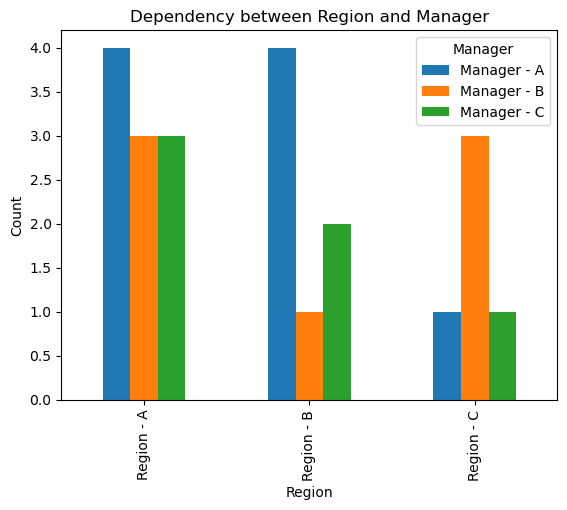

In [28]:
# Visualize the Region & Manager

contingency_table.plot(kind='bar')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Dependency between Region and Manager')
plt.legend(title='Manager')
plt.show()